In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df['customerID'].duplicated().sum()

np.int64(0)

In [19]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)


### Converted 0 and 1 values of senior citizen to yes/no it easier to understand 

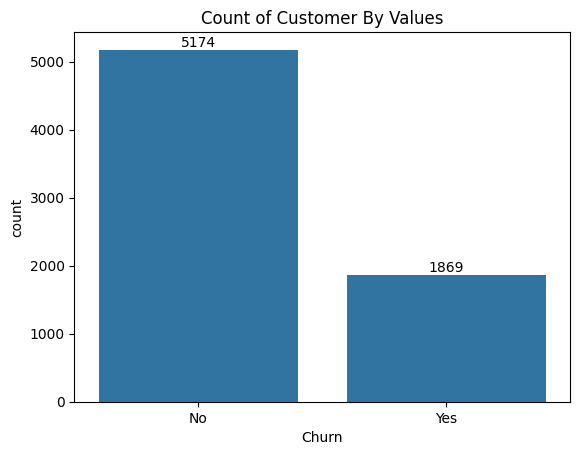

In [35]:
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer By Values")
plt.show()

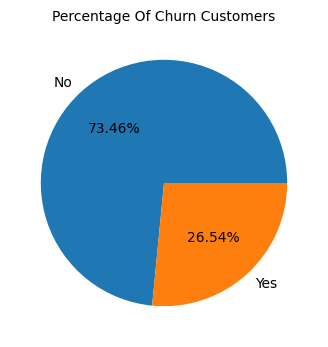

In [36]:
plt.figure(figsize=(4,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels= gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of Churn Customers",fontsize=10)
plt.show()

### form the given pie chart we can conclude that 26.5% of our customers have churned 

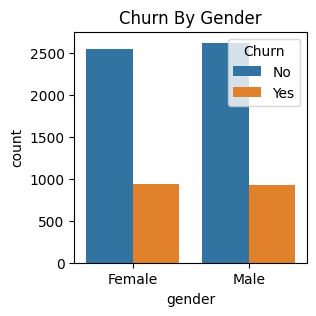

In [45]:
plt.figure(figsize=(3,3))
sns.countplot(x = "gender", data=df , hue= "Churn")
plt.title("Churn By Gender")
plt.show()


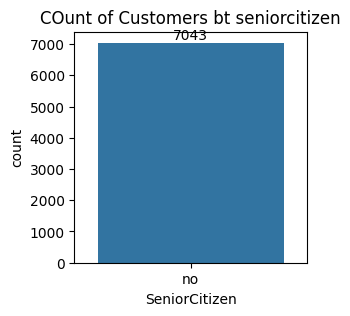

In [52]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("COunt of Customers bt seniorcitizen")
plt.show()

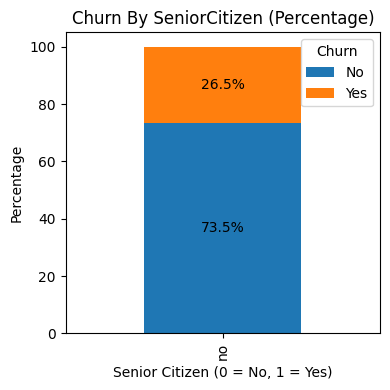

In [53]:

# Step 1: Calculate counts of each group
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Step 2: Calculate percentage of total for each SeniorCitizen category
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(4,4), color=['#1f77b4', '#ff7f0e'])

# Step 4: Add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Step 5: Customize the plot
plt.title('Churn By SeniorCitizen (Percentage)')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### comparative a great percetage of people in senior citizen category have churned

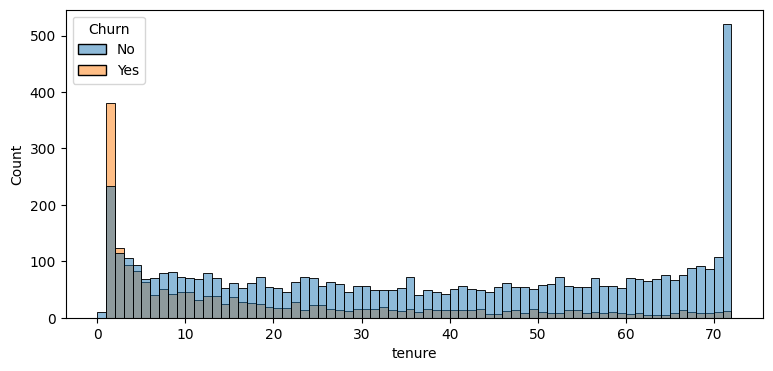

In [62]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins =72, hue = "Churn")
plt.show()

### people who have used our servies for a long  time have  stayed and people who  have used our servies for 1 or 2 moths have churned

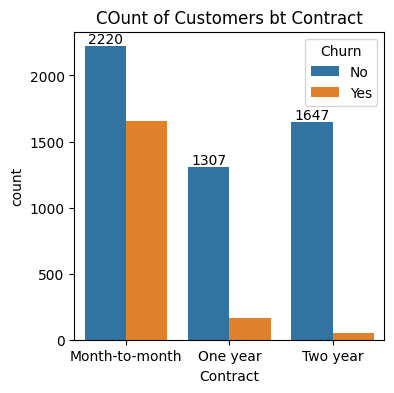

In [64]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract",data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("COunt of Customers bt Contract")
plt.show()

#### people who have month to month contract are likely to churn then from who have 1  or 2 years of contract

In [65]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

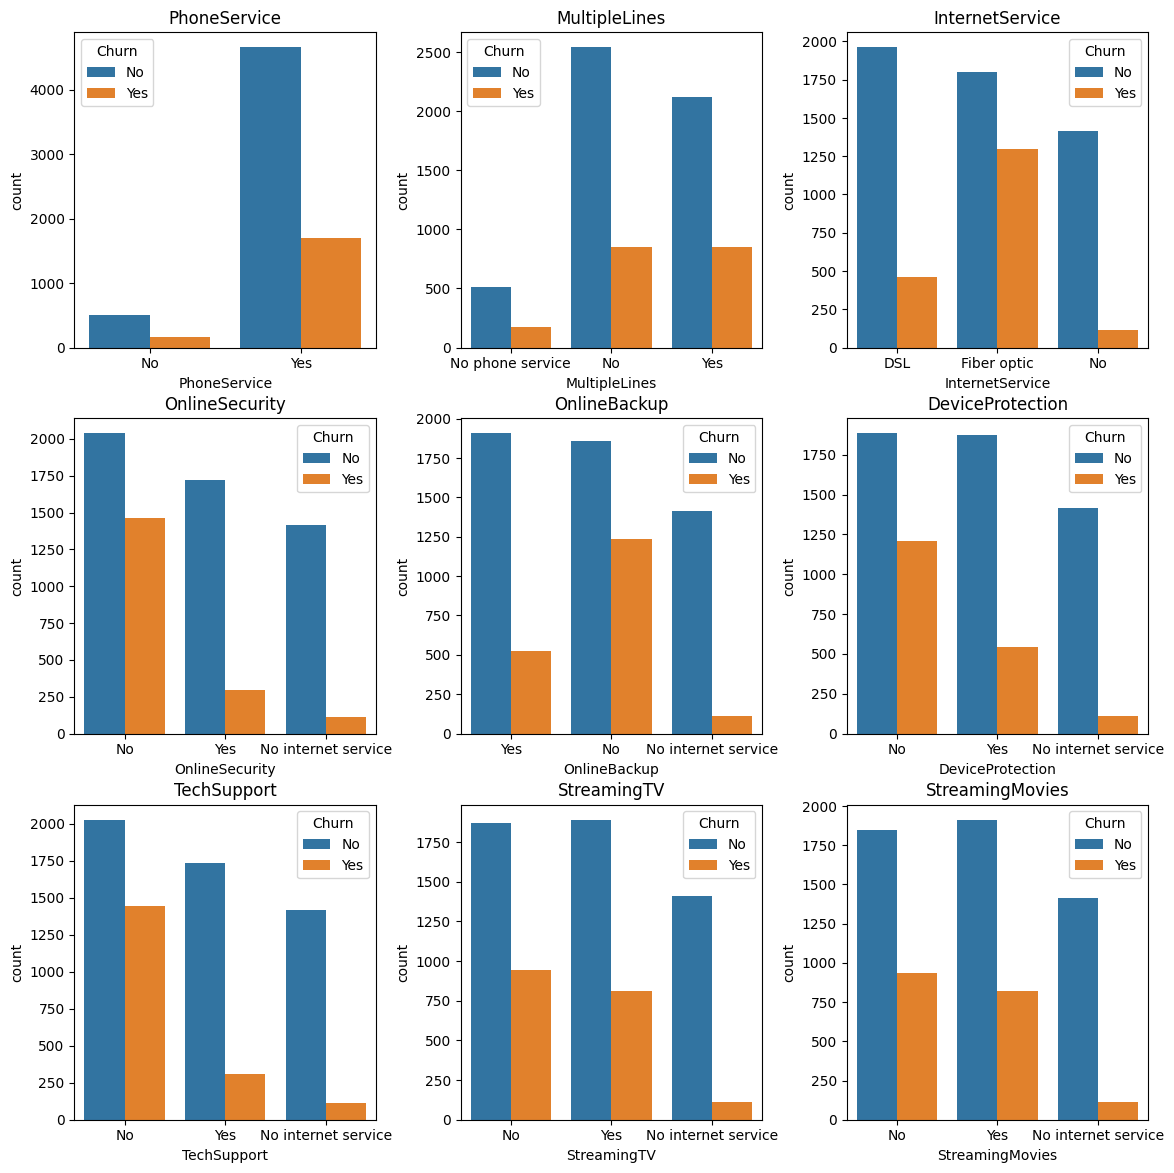

In [70]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid
fig.tight_layout(pad=3.0)  # Add space between plots

columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for ax, col in zip(axes.flatten(), columns):
    sns.countplot(data=df, x=col, ax=ax, hue=df['Churn'])
    ax.set_title(col)
plt.show()


#### Customers with internet services like fiber optic or who have opted for OnlineSecurity, TechSupport, and DeviceProtection tend to churn less. Conversely, churn rates are higher among those without these services, particularly for those who lack OnlineBackup, StreamingTV, and StreamingMovies subscriptions. The absence of internet service also correlates with lower churn.

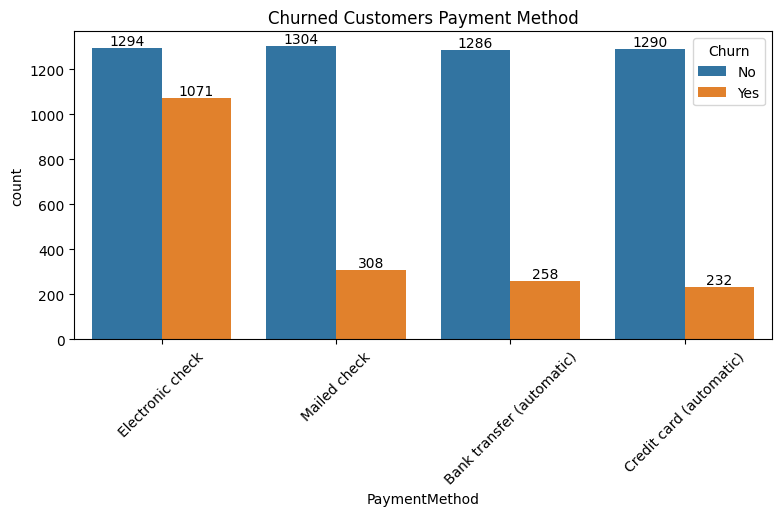

In [77]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x = "PaymentMethod",data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers Payment Method")
plt.xticks(rotation = 45)
plt.show()

#### customer is likely to churn when he is using electronic check as a payment method